In [1]:
import numpy as np
from AMAT.approach import Approach
from AMAT.orbiter import PropulsiveOrbiter
import matplotlib.pyplot as plt

In [2]:
approach = Approach(
    "TITAN", 
    v_inf_vec_icrf_kms=np.array([-0.910, 5.081, 4.710]),
    rp=(2575 + 1700)*1e3, 
    psi=np.pi
)

In [3]:
approach.v_inf_mag_kms

6.9877579379941315

In [4]:
orbiter = PropulsiveOrbiter(approach=approach, apoapsis_alt_km=1700)

In [5]:
orbiter.DV_OI_mag

5832.923148316219

In [6]:
def mf_m0(DV, Isp=320):
    return  1 - 1.10*(1 - np.exp(-DV/(Isp*9.80665)))

In [7]:
mf_m0(orbiter.DV_OI_mag)

0.07145802577390381

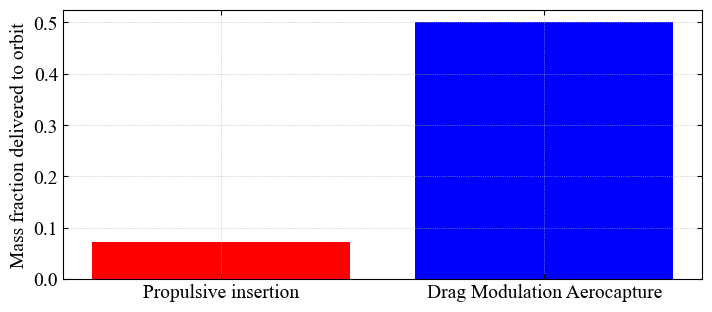

In [8]:
plt.figure(figsize=(8.25, 3.5))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

methods = ['Propulsive insertion', 'Drag Modulation Aerocapture']
mass_fractions = [mf_m0(orbiter.DV_OI_mag), 0.50]
bar_colors = ['red', 'blue']

plt.bar(methods, mass_fractions, color=bar_colors)

ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
plt.grid(linestyle='dotted', linewidth=0.5)
plt.ylabel('Mass fraction delivered to orbit', fontsize=14)

plt.savefig('../performance-analysis-plots/titan.png', dpi= 300, bbox_inches='tight')
plt.show()